In [1]:
!pip install scikit-learn
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [37]:
X_train = []
y_train = [] 

data = pd.read_csv('./dados_finais.csv', header=None)

X = data.iloc[:, :9]
Y = data.iloc[:, 9] 

data.head()

,0,1,2,3,4,5,6,7,8,9
0,-1,0,1,0,1,0,-1,1,0,hasgame
1,-1,0,1,0,0,1,1,1,0,hasgame
2,-1,0,1,0,1,-1,0,1,0,hasgame
3,-1,1,0,0,0,1,1,1,0,hasgame
4,-1,1,1,-1,0,0,1,1,0,hasgame


In [38]:
# Saber quantas linhas existem de cada classe
count_scenarios = pd.crosstab(index=data[9], columns="count")
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, stratify=Y)
count_scenarios



col_0,count
9,
hasgame,300
owin,294
tie,32
xwin,300


O melhor valor de k é: 10 com acurácia média de: 0.7595


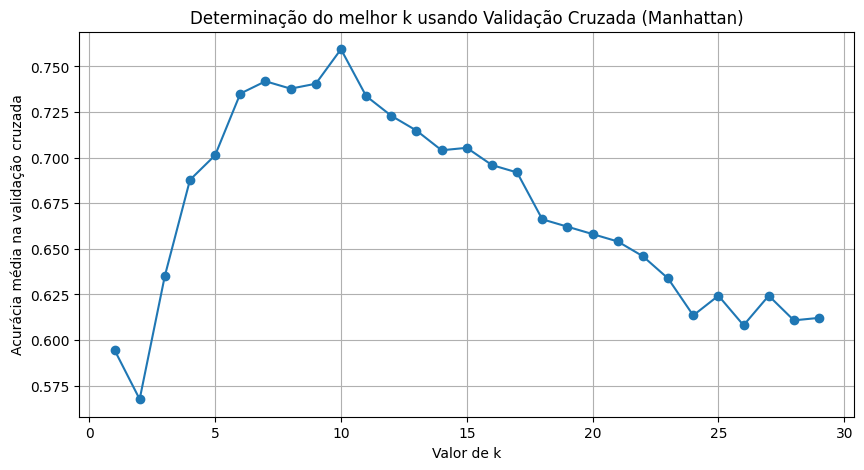

In [36]:

# Avaliar diferentes valores de k
k_range = range(1, 30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())

# Encontrar o melhor valor de k
optimal_k = k_range[np.argmax(scores)]
print(f'O melhor valor de k é: {optimal_k} com acurácia média de: {max(scores):.4f}')

# Plotar gráfico de desempenho
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média na validação cruzada')
plt.title('Determinação do melhor k usando Validação Cruzada (Manhattan)')
plt.grid(True)
plt.show()

In [39]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

y_prediction = knn.predict(X_test)
confusion_matrix(y_test, y_prediction)

array([[52,  8,  0,  0],
       [16, 40,  0,  3],
       [ 0,  0,  6,  1],
       [ 7,  8,  1, 44]])

In [40]:
# Usando indexação padrão para arrays NumPy
ndtest = y_test.to_numpy()

acerto = 0
for i in range(len(y_prediction)):
    if y_prediction[i] == ndtest[i]:  # Indexação padrão para numpy arrays
        acerto += 1

print("Acuracia: ", acerto / len(y_prediction))
print(accuracy_score(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

Acuracia:  0.7634408602150538
0.7634408602150538
              precision    recall  f1-score   support

     hasgame       0.69      0.87      0.77        60
        owin       0.71      0.68      0.70        59
         tie       0.86      0.86      0.86         7
        xwin       0.92      0.73      0.81        60

    accuracy                           0.76       186
   macro avg       0.80      0.78      0.78       186
weighted avg       0.78      0.76      0.76       186



In [49]:
# Exemplo individual (troque pelos valores desejados)
exemplo_teste = [[1, 0, 1, 
                  -1, 0, 0, 
                  1, 0, -1]]

# Predição da classe
resultado = knn.predict(exemplo_teste)
print("Classe prevista:", resultado[0])

# Probabilidades por classe
probabilidades = knn.predict_proba(exemplo_teste)
print("Probabilidades por classe:", probabilidades[0])

Classe prevista: owin
Probabilidades por classe: [0.2 0.7 0.  0.1]
